# Install și import

**In order to get the fastest predictions you need to enable GPUs for the notebook:**
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down
(https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=oM_8ELnJq_wd)

In [ ]:
!pip install tabpfn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd
import torch
import os
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pathlib import Path

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay


# Atribute

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/Parkinson CSV files/mdfa_only.csv')
features.head(5)

,filename,a_1,a_2,a_3,a_4,a_5,e_1,e_2,e_3,e_4,...,o_2,o_3,o_4,o_5,u_1,u_2,u_3,u_4,u_5,label
0,AVPEPUDEAC000,0.004998,2.712627,14.729884,0.252715,0.476202,0.008278,2.711710,40.731129,0.371509,...,2.594078,40.986578,0.403692,1.548063,0.001032,2.169425,55.568382,0.330444,1.378344,Control
1,AVPEPUDEAC000,0.004446,2.810381,12.473234,0.228863,0.361383,0.009167,2.891195,31.934897,0.335807,...,2.989899,26.758061,0.360279,0.615448,0.001873,2.248821,53.709793,0.321121,1.117390,Control
2,AVPEPUDEAC000,0.005410,2.920106,13.010246,0.241330,0.289196,0.009900,3.275557,27.904422,0.324292,...,2.849095,29.995854,0.419136,0.803891,-0.000530,1.798299,7252.405373,0.744172,5127.473762,Control
3,AVPEPUDEAC000,-0.014495,1.772590,28.693571,0.679977,0.744483,0.011789,2.548201,31.917531,0.739426,...,2.580999,30.238907,0.669466,0.589213,0.003083,2.261394,55.782078,0.612338,0.987351,Control
4,AVPEPUDEAC000,0.001403,2.227347,24.353469,0.754135,0.572253,0.011098,2.725983,31.638528,0.699980,...,2.481945,31.885390,0.833531,0.639538,0.006110,2.413387,50.716815,0.788954,0.928461,Control


In [ ]:
features.shape

(300, 27)

In [ ]:
features.describe()


,a_1,a_2,a_3,a_4,a_5,e_1,e_2,e_3,e_4,e_5,...,o_1,o_2,o_3,o_4,o_5,u_1,u_2,u_3,u_4,u_5
count,300.000000,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,3.000000e+02,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,-0.008938,1.816658,2.049202e+11,0.258652,1633.312924,0.006614,2.313544,1.368253e+04,0.334111,585.981791,...,0.001057,2.240424,13364.338630,3.869631,452.805345,0.001135,2.295015,980.202250,2.256780,310.038344
std,0.035525,1.174762,3.538662e+12,0.308634,2358.396977,0.010218,0.753672,1.220670e+05,0.375959,1537.416745,...,0.009748,0.748217,73224.451357,61.033422,1457.653451,0.015395,0.575220,3949.178793,23.280461,1108.905314
min,-0.397186,0.224819,3.513282e-02,0.012684,0.065961,-0.014450,0.907644,1.235780e+01,0.021543,0.015394,...,-0.091785,0.189669,12.851653,0.019223,0.000571,-0.254800,0.085329,15.514687,0.016885,0.000027
25%,-0.009257,1.035546,1.905606e+01,0.089628,0.536931,0.000803,1.731404,3.285130e+01,0.107467,0.679973,...,-0.001346,1.697120,28.534735,0.117499,0.639147,-0.000017,1.933189,42.281486,0.114400,0.885245
50%,-0.001177,1.434318,1.233843e+02,0.193838,2.715147,0.003442,2.357322,4.591695e+01,0.249979,1.109938,...,0.000983,2.223318,39.802548,0.259968,1.059383,0.001127,2.248711,56.967194,0.279073,1.295706
75%,0.003427,2.224048,1.059682e+05,0.325877,3458.148257,0.009067,2.737415,1.099845e+02,0.407500,2.594130,...,0.004216,2.643987,73.411108,0.440589,2.151563,0.003078,2.545552,109.064013,0.491268,2.567016
max,0.077378,8.232905,6.129176e+13,2.607913,10792.725586,0.046587,7.852647,1.798867e+06,3.143568,7135.640071,...,0.045183,6.991993,714579.428092,1057.455272,7903.220258,0.027411,5.574837,30985.302129,307.938378,5704.365317


In [ ]:
features['label']

0          Control
1          Control
2          Control
3          Control
4          Control
          ...     
295    Patologicas
296    Patologicas
297    Patologicas
298    Patologicas
299    Patologicas
Name: label, Length: 300, dtype: object

In [ ]:
features.groupby('label').count()

,filename,a_1,a_2,a_3,a_4,a_5,e_1,e_2,e_3,e_4,...,o_1,o_2,o_3,o_4,o_5,u_1,u_2,u_3,u_4,u_5
label,,,,,,,,,,,,,,,,,,,,,
Control,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
Patologicas,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150


In [ ]:
labels = np.array(features['label'])

features= features.drop(['filename','label'], axis = 1)

feature_list = list(features.columns)

features = np.array(features)

# Model

In [ ]:
X = features
y = labels

In [ ]:
skf=StratifiedShuffleSplit(n_splits=2,test_size=0.33)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


TRAIN: [ 65 194 158 114  62  61 273  25  34 101 260 244 198 264  98 226 295 181
 289  74 278 142 291 192 119 129 258 212  58 267 148 121 133 136 128 276
  81 228 294 151 224  43 217  90 143  67 191  47 157 144 215 150  37 275
  56 206 107  88 109  92 197 177 179 163  49 189  71 282 159 160 229 216
 211 227  99  48  77  26 182 208 115 116  63 237 248 252 287 171  21  27
  93  12 132 261  17  94 283 141 279  84  52 134  18  73  66   7 209 173
 180  51 232 147 214 105 262 108 178 288 281  96 153  35 256 117 175  23
 102 219  33 130 250 293  78 223  70 246 168 184   3 146  57  97 239 285
 124  59 165 149 254  24 152 135 297  60  86 190 169 210 145 201 170  54
  38 263 202 122 249 299  75  87 204  32   0 164  20   6 290  39 113  16
 298  82 272 137 238  41 251 104 220 225 242 185   5  69 280 110 126 167
 241  42 243] TEST: [ 64 183  91 230 188  29  80 111 106  76 233  19 154 174 259 112 162 271
 221 234 131 245 240 139  89  83  10 274 269 231 292 222 187 253 100  45
  44  13 284 205 166 123

In [ ]:
classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=4)

Using style prior: True
Using cuda device
Using a Transformer with 25.82 M parameters


In [ ]:
start = time.time()
classifier.fit(X_train, y_train)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
print('Prediction time: ', time.time() - start, 'Accuracy', accuracy_score(y_test, y_eval))

Prediction time:  0.17020440101623535 Accuracy 0.7575757575757576


In [ ]:
out_table = pd.DataFrame(X_test.copy().astype(str))
out_table['prediction'] = [f"{y_e} (p={p_e:.2f})" for y_e, p_e in zip(y_eval, p_eval)]
out_table

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,prediction
0,-0.0043477786555117,1.119130603254202,99.32330147165794,0.1966777607006366,1.4329252161942525,0.0021902823063865,1.6233548417472317,166.28476494656087,0.1923825633685097,2.821062147456771,...,1.5846389579056828,51.13130215964089,0.2404078089466049,1.0009892347069267,-0.0013424213133634,1.5195914579574947,17551.550490159727,0.2661678246677866,2566.3240369204946,Control (p=0.52)
1,-0.0092365769108484,0.820097921545032,90.15071435721347,0.0470856724663528,2.1262618935562805,0.0009255105178605,2.636475863342158,33.26919653358203,0.0550813328869551,0.5146449172559104,...,1.9964059738363549,40.40713141382158,0.062809877135207,0.7218007444119214,0.0002393391350485,2.162445662652368,60.74235431789598,0.0724062261500129,0.9226607647056302,Control (p=0.89)
2,-0.0045916573012058,0.7868503777417303,2293460.715779128,0.0550736068142912,3035.010336915445,0.0003156360056464,1.5699162658412822,456.2915654793498,0.0696911424236848,9.02121019268768,...,2.0130433863470105,49.58522702624064,0.0595112231621846,1.0674880185300877,0.0006109079322834,2.111255167783188,64.3666746598389,0.0933368833842073,1.2261839250477853,Control (p=0.99)
3,-0.0007600904817699,1.0975699793348654,267251.2573807085,0.0401596183451471,5148.978413078066,-0.0013892960056858,1.4971651933735268,74.02428385264683,0.0545199582621782,1.3716141727675295,...,2.6820581346661525,26.494504220249198,0.0770485962215092,0.4760659867256152,-0.0009679810410537,1.5950908336161904,193.08080017348175,0.0897942444740748,3.2125292430179835,Control (p=0.96)
4,0.0010725420917248,1.5983439403735844,23655.147066087728,0.3639496487618394,4958.533638568959,0.0062714724340454,1.812957185730932,11893.169275077054,0.9205174682556851,5640.196478003721,...,1.876497007655776,8111.0135361842,0.658806083519171,6281.656172713178,-0.0051030433593745,1.7760489060794484,7788.892257560365,0.998214730006299,3880.319333675935,Patologicas (p=0.90)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-0.1159230310380673,0.5583279255126096,20396873.60147131,0.3134524286904457,1553.2571488577755,-0.0016910692801314,1.7120097360525597,47.51929661416738,0.3820304988276169,0.9017728319425566,...,1.41269562993104,70.82513555551839,0.5398611285710283,1.4533355606474108,0.0022054204416972,2.2290585873027737,56.63825792234346,0.5914708940918848,0.947804997796658,Patologicas (p=0.81)
95,-0.00736222013053,0.8237960257923027,2151165.027264748,0.0779367015169519,4339.114894035937,0.0003441853435955,1.7886956154316318,56.5520519051264,0.0504536364458602,1.088281552702781,...,2.580879427429424,27.955408962208185,0.0434791205578704,0.6154086584437259,0.000283638389242,2.2210931966437184,54.56159883742939,0.0440055534322309,0.847326673376086,Control (p=0.98)
96,0.0008796108820863,1.5327623772237573,35368.432367831025,0.0454539831551357,4976.1534420887565,8.642688127808745e-05,1.6659781691899649,21688.8410067796,0.0593473555192173,4925.739579362674,...,1.2833756555015563,93600.82413955731,0.0407296659144621,4900.697181592556,0.0003698462807452,2.1360117961344818,160.64817497855523,0.0489848422989603,1.8881702202771344,Control (p=0.58)
97,0.0007173688194511,1.110158888289177,196711.48633726,0.1991399161078597,5317.452186167837,0.001750805136692,1.657463879010288,12702.815727957835,0.4683064907744462,3251.660411746729,...,1.4661471115654794,38423.18726289245,0.3269084256462091,6660.321290804451,0.0011692592905156,1.9529657652071009,145.57226337066095,0.6939647256569764,2.7747960730147305,Patologicas (p=0.88)


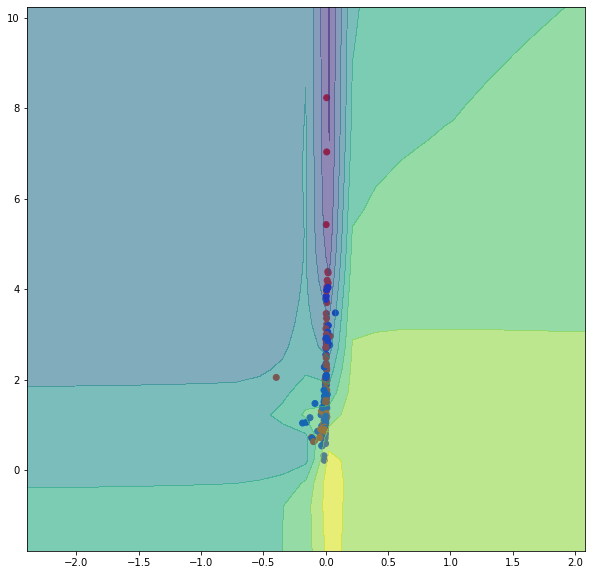

In [ ]:
# PLOT
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Plot punctele folosite la training
vfunc = np.vectorize(lambda x : np.where(classifier.classes_ == x)[0])
y_train_index = vfunc(y_train)
y_train_index = y_train_index == 0

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train_index, cmap=cm_bright)

classifier.fit(X_train[:, 0:2], y_train_index)

DecisionBoundaryDisplay.from_estimator(
    classifier, X_train[:, 0:2], alpha=0.6, ax=ax, eps=2.0, grid_resolution=25, response_method="predict_proba"
)